In [1]:
# Data 205 - Capstone in Data Science
# Jennifer Paraboschi     Fall 2020
# Inputs: data sets from dataMontgomery
# including Alcohol Beverage Licensing Violations

In [2]:
# Import packages. 
# Pull in API data set as json.
import json
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly    # I had to pip install plotly on the cmd line to get plotly to work
import plotly.express as px

In [3]:
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()
#pd.read_json("https://....")    #alternative way to read the data

,facilityname,address,violationdate,violation,disposition,dispositiondate
0,AMY TEX MEX BAR & GRILL,"621 SLIGO AVE. , SILVER SPRING , MARYLAND - 20910",2020-10-31T00:00:00.000,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,NaN
1,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-10-31T00:00:00.000,5.10 DISPENSING OF LIQUOR,$1000 +ALERT,NaN
2,A.C. GRILL,"293 MUDDY BRANCH ROAD , GAITHERSBURG , MARYLAN...",2020-10-29T00:00:00.000,5.4 ALCOHOL AWARENESS CERTIFICATION,$100 +ALERT,NaN
3,ANTOJITOS RESTAURANT,"12 EAST DIAMOND AVE. , GAITHERSBURG , MARYLAND...",2020-10-25T00:00:00.000,6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CO...,$1000 +ALERT,NaN
4,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND...",2020-10-25T00:00:00.000,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,NaN


In [4]:
print(violations_data)

                facilityname  \
0    AMY TEX MEX BAR & GRILL   
1            EL CARACOL CAFE   
2                 A.C. GRILL   
3       ANTOJITOS RESTAURANT   
4     CANCUN MEXICAN CUISINE   
..                       ...   
945             JOSE'S GRILL   
946             JOSE'S GRILL   
947       SEVEN-ELEVEN STORE   
948       SEVEN-ELEVEN STORE   
949       SEVEN-ELEVEN STORE   

                                               address  \
0    621 SLIGO AVE. , SILVER SPRING , MARYLAND - 20910   
1     609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910   
2    293 MUDDY BRANCH ROAD , GAITHERSBURG , MARYLAN...   
3    12 EAST DIAMOND AVE. , GAITHERSBURG , MARYLAND...   
4    117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND...   
..                                                 ...   
945             11423 GEORGIA AVE. , WHEATON, MD 20902   
946             11423 GEORGIA AVE. , WHEATON, MD 20902   
947  14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...   
948       14101 GEORGIA AVE. , ASPE

In [5]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilityname     950 non-null    object
 1   address          950 non-null    object
 2   violationdate    950 non-null    object
 3   violation        950 non-null    object
 4   disposition      948 non-null    object
 5   dispositiondate  941 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [6]:
# need to change the dates so they are in a useable format.
violations_data.violationdate = pd.to_datetime(violations_data.violationdate)
violations_data.dispositiondate = pd.to_datetime(violations_data.dispositiondate)

In [7]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   facilityname     950 non-null    object        
 1   address          950 non-null    object        
 2   violationdate    950 non-null    datetime64[ns]
 3   violation        950 non-null    object        
 4   disposition      948 non-null    object        
 5   dispositiondate  941 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 44.7+ KB


In [8]:
violations_data.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate
count,950,950,950,950,948,941
unique,548,586,344,40,146,408
top,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2018-08-17 00:00:00,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2020-09-11 00:00:00
freq,11,11,16,381,96,18
first,NaN,NaN,2012-06-19 00:00:00,NaN,NaN,2016-01-19 00:00:00
last,NaN,NaN,2020-10-31 00:00:00,NaN,NaN,2020-11-30 00:00:00


In [9]:
# There are a few missing values for disposition and disposition date (counts are fewer than total count in some columns).
# The most frequent violation is for sale to minor.

In [10]:
violations_data.isnull().sum()
# This gives the number of null values for each var.

facilityname       0
address            0
violationdate      0
violation          0
disposition        2
dispositiondate    9
dtype: int64

In [11]:
# Other EDA from https://www.youtube.com/watch?v=-o3AxdVcUtQ
violations_data.nunique()
# This gives the number of unique values for each variable

facilityname       548
address            586
violationdate      344
violation           40
disposition        146
dispositiondate    408
dtype: int64

In [12]:
# Provide a list of the violations.
violations_data.violation.unique()

array(['6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS',
       '5.10 DISPENSING OF LIQUOR', '5.4 ALCOHOL AWARENESS CERTIFICATION',
       '6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CONSUMPTION OR POSSESSION BY\n\nINTOXICATED PERSONS',
       '6.8 ALCOHOLIC BEVERAGE CONTAINERS- REFILLING/TAMPERING',
       '5.5 RECORDS', '5.7 DISPLAY OF LICENSE', '6.9 STORAGE',
       '6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS',
       '5.2 CHANGES IN LICENSING INFORMATION', 'NO VIOLATION',
       '6.3 AGES OF EMPLOYEES', 'SALE TO MINOR',
       'EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED',
       'LICENSE NOT PROPERLY DISPLAYED',
       'ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES', 'STORAGE',
       "LICENSEES' RESPONSIBILITY", 'ACTS CONTRARY TO LAW',
       'LICENSE COMPLIANCE CHECK', 'DISORDERLY HOUSE',
       'NOISE/DISTURBANCE OF THE NEIGHBORHOOD',
       'DISPENSING LIQUOR BY BOTTLE FOR CONSUMPTION ONSITE',
       'REFILLING EMPTY/PARTIALLY EMPT

In [13]:
# From this video https://www.youtube.com/watch?v=5NcbVYhQJvw
# count by category crosstab
violations_dist = violations_data.groupby("violation").size()

In [14]:
# Get counts of the number of violations at each violation type.
violations_data["violation"].value_counts().sort_values(ascending=False)

SALE TO MINOR                                                                                      381
ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES                                                 173
6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS                                  66
EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED                                                       64
LICENSE NOT PROPERLY DISPLAYED                                                                      57
RECORDS INVOICE VIOLATION                                                                           27
5.4 ALCOHOL AWARENESS CERTIFICATION                                                                 26
SALE/SERVICE TO INTOXICATED PATRON                                                                  16
STORAGE                                                                                             14
5.5 RECORDS                                                              

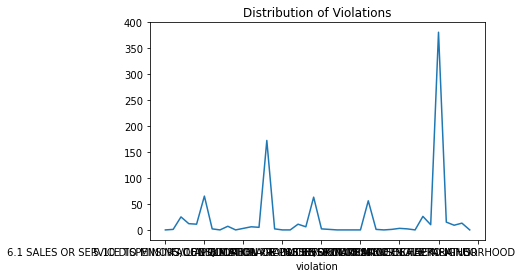

In [15]:
violations_dist.plot(title="Distribution of Violations")

In [16]:
# This is not helpful unless I can clean it up. 

In [17]:
# Get counts of the number of violations at each facility name.
pd.set_option("display.max_rows", None)
violations_data["facilityname"].value_counts().sort_values(ascending=False)

GAITHERSBURG SUPERMARKET                           11
KALDI'S COFFEE                                      8
CAFE 20/20                                          8
AKIRA RAMEN IZAKAYA                                 6
GENTLEMAN JIM'S RESTAURANT                          6
PANDORA SEAFOOD HOUSE                               6
MOGOTILLO RESTAURANT                                6
RESTAURANT POLLOS EL MESON                          6
BAR LOUIE                                           6
FUSION BAR & GRILL                                  5
TACO BAR                                            5
KAYPI RESTAURANT                                    5
TRAPEZARIA MEDITERRANEAN KUZINA                     5
SUPER CHICKEN                                       5
CHIPOTLE MEXICAN GRILL                              5
MIX BAR & GRILLE                                    5
OUTBACK STEAKHOUSE                                  5
OGEI'S CHICKEN & SUBS                               5
CANCUN MEXICAN CUISINE      

In [18]:
# Gaithersburg Supermarket has had the greatest number of violations. 
violations_data[violations_data.facilityname == "GAITHERSBURG SUPERMARKET"]

,facilityname,address,violationdate,violation,disposition,dispositiondate
161,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-09-24,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREM...,2 WEEK SUSPENSION STARTING FROM JANUARY 20- FE...,2019-09-24
198,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-08-01,EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED,SETTLED;$500+ALERT,2019-08-01
199,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-08-01,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREM...,2 WEEK SUSPENSION + ALERT (OCTOBER 9-OCTOBER 2...,2019-08-01
200,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-08-01,LICENSE NOT PROPERLY DISPLAYED,SETTLED;$100+ALERT,2019-08-01
227,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-06-05,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREM...,SETTLED;$500 + ALERT,2019-06-05
228,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-06-05,EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED,$500+ALERT,2019-06-05
229,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2019-06-05,RECORDS INVOICE VIOLATION,SETTLED;$500+ ALERT,2019-09-09
698,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2017-04-03,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREM...,SETTLED; $500.00 + ALERT,2017-06-05
841,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2016-06-09,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREM...,SETTLED; $100.00 + ALERT,2016-08-19
842,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2016-06-09,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2016-08-16


In [19]:
"""
Explore the penalties for the violations
"""

'\nExplore the penalties for the violations\n'

In [20]:
# The disposition var inconsistently contains a $ amount of the penalty with inconsistent formatting. 
# Use a regex to extract the penalty values.
violations_data["penalty"]=violations_data["disposition"].str.extract(r"((?<=\$)\d+)")
# This regex looks for the dollar sign (\$), then pulls all the digits (\d+) unlimited times (to the end).

In [21]:
violations_data["penalty"] # checking that the penalty amounts pulled in correctly.

0      1000
1      1000
2       100
3      1000
4      1000
5       200
6      1000
7       500
8       100
9      1600
10      100
11      500
12      400
13      500
14      100
15      500
16     1000
17     1000
18      100
19      500
20     2500
21      100
22     1000
23     1000
24     1000
25     1000
26        0
27     1000
28     2500
29      100
30     2500
31      500
32     1000
33     1000
34      100
35     1000
36      500
37      500
38     2500
39     1000
40     1000
41     1000
42     1000
43     1000
44     1000
45     2500
46     1000
47     1000
48      500
49      500
50      100
51      100
52     1000
53     1000
54      NaN
55     1000
56     1000
57      100
58      500
59     2500
60      100
61      100
62      100
63     1000
64        0
65     1000
66     2500
67     1000
68      100
69      100
70     1000
71      500
72     1000
73     1000
74      100
75      500
76     1000
77     1000
78      500
79      100
80      500
81      100
82      200
83  

In [22]:
violations_data["disposition"] # checking that the disposition column remained unchanged. 

0                                           $1000 +ALERT
1                                           $1000 +ALERT
2                                            $100 +ALERT
3                                           $1000 +ALERT
4                                           $1000 +ALERT
5                                            $200 +ALERT
6                                           $1000 +ALERT
7                                            $500 +ALERT
8                                            $100 +ALERT
9                                           $1600 +ALERT
10                                           $100 +ALERT
11                                           $500 +ALERT
12                                           $400 +ALERT
13                                           $500 +ALERT
14                                           $100 +ALERT
15                                           $500 +ALERT
16                                          $1000 +ALERT
17                             

In [23]:
violations_data.isnull().sum() # provides a count of nulls for each var.

facilityname        0
address             0
violationdate       0
violation           0
disposition         2
dispositiondate     9
penalty            51
dtype: int64

In [24]:
# There are 51 records with no penalty value (nulls). 
# Some records did not result in a penalty being assessed.
# Need to provide a value (0) for the missing penalty amounts. 

In [25]:
# Replace missing penalty values with 0.
violations_data["penalty"]=violations_data["penalty"].fillna(0)
# change the penalty type to an integer.
violations_data["penalty"]=violations_data["penalty"].astype(int)

In [26]:
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
0,AMY TEX MEX BAR & GRILL,"621 SLIGO AVE. , SILVER SPRING , MARYLAND - 20910",2020-10-31,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,NaT,1000
1,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-10-31,5.10 DISPENSING OF LIQUOR,$1000 +ALERT,NaT,1000
2,A.C. GRILL,"293 MUDDY BRANCH ROAD , GAITHERSBURG , MARYLAN...",2020-10-29,5.4 ALCOHOL AWARENESS CERTIFICATION,$100 +ALERT,NaT,100
3,ANTOJITOS RESTAURANT,"12 EAST DIAMOND AVE. , GAITHERSBURG , MARYLAND...",2020-10-25,6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CO...,$1000 +ALERT,NaT,1000
4,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND...",2020-10-25,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,NaT,1000
5,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND...",2020-10-25,6.8 ALCOHOLIC BEVERAGE CONTAINERS- REFILLING/T...,$200 +ALERT,NaT,200
6,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30,1000
7,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500
8,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100
9,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600


In [27]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   facilityname     950 non-null    object        
 1   address          950 non-null    object        
 2   violationdate    950 non-null    datetime64[ns]
 3   violation        950 non-null    object        
 4   disposition      948 non-null    object        
 5   dispositiondate  941 non-null    datetime64[ns]
 6   penalty          950 non-null    int32         
dtypes: datetime64[ns](2), int32(1), object(4)
memory usage: 48.4+ KB


In [28]:
# Get counts of the number of violations at each penalty amount.
violations_data["penalty"].value_counts().sort_values(ascending=False)

1000    398
100     209
500     157
2500     76
0        53
1         8
2         7
200       7
400       6
600       5
800       3
4         2
3000      2
1800      1
1200      1
2300      1
8         1
9         1
10        1
7200      1
8000      1
333       1
2000      1
5000      1
1500      1
2900      1
2600      1
1600      1
2800      1
7         1
Name: penalty, dtype: int64

In [29]:
# Most of the violations are for $1,000, $100, or $500. 
# Look at the max value or the facility that received the highest penalty amount.
violations_data[violations_data.penalty == violations_data.penalty.max()]

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
485,SILVER SPRING HILTON HOTEL,"8727 COLESVILLE ROAD , SILVER SPRING, MD 20910",2018-04-11,SALE TO MINOR,SETTLED; $8000+ALERT,2018-08-02,8000


In [30]:
# Silver Spring Hilton Hotel had the violation with the highest penalty. 
violations_data[violations_data.facilityname == "SILVER SPRING HILTON HOTEL"]

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
485,SILVER SPRING HILTON HOTEL,"8727 COLESVILLE ROAD , SILVER SPRING, MD 20910",2018-04-11,SALE TO MINOR,SETTLED; $8000+ALERT,2018-08-02,8000
930,SILVER SPRING HILTON HOTEL,"8727 COLESVILLE ROAD , SILVER SPRING, MD 20910",2015-12-22,SALE TO MINOR,"SETTLED; $2,500 + ALERT",2016-02-04,2


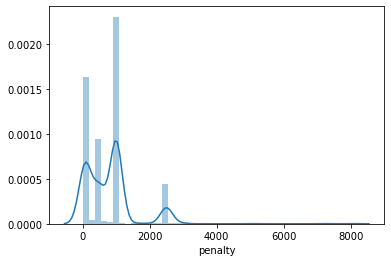

In [31]:
# Explore distribution of the penalty amounts.
sns.distplot(violations_data["penalty"])  # or can add , bins = 20)]

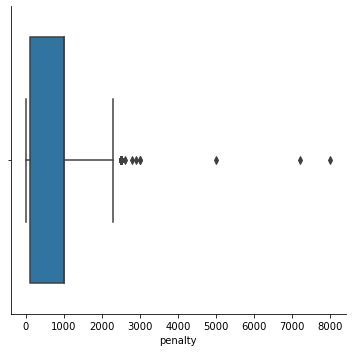

In [32]:
sns.catplot(x="penalty", kind="box", data=violations_data)

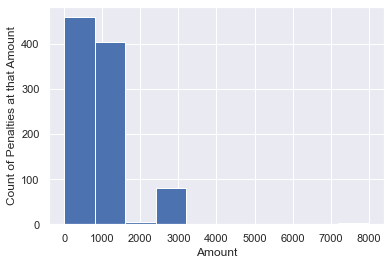

In [33]:
sns.set()
_ = plt.hist(violations_data['penalty'])
_ = plt.xlabel('Amount')
_ = plt.ylabel('Count of Penalties at that Amount')
plt.show()

In [34]:
violations_data.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
count,950,950,950,950,948,941,950.000000
unique,548,586,344,40,146,408,NaN
top,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2018-08-17 00:00:00,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2020-09-11 00:00:00,NaN
freq,11,11,16,381,96,18,NaN
first,NaN,NaN,2012-06-19 00:00:00,NaN,NaN,2016-01-19 00:00:00,NaN
last,NaN,NaN,2020-10-31 00:00:00,NaN,NaN,2020-11-30 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,780.944211
std,NaN,NaN,NaN,NaN,NaN,NaN,754.795755
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [35]:
# From above - counts of violations. These are the top 5 most frequent violations.
"""
SALE TO MINOR                                                                                      381
ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES                                                 173
6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS                                  66
EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED                                                       64
LICENSE NOT PROPERLY DISPLAYED                                                                      57
"""

# Pull top 5 most frequent violations into a subset
top_5_violations = violations_data[violations_data["violation"].isin(["SALE TO MINOR","ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES","6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS","EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED","LICENSE NOT PROPERLY DISPLAYED"])]


In [36]:
# count by category crosstab
violations_dist_top5 = top_5_violations.groupby("violation").size()

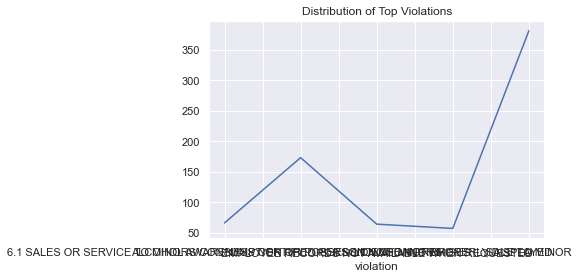

In [37]:
violations_dist_top5.plot(title="Distribution of Top Violations")


In [38]:

# Perhaps look at average amount of penalty for each kind of violation?
# Maybe bar charts of violation amounts by type? 

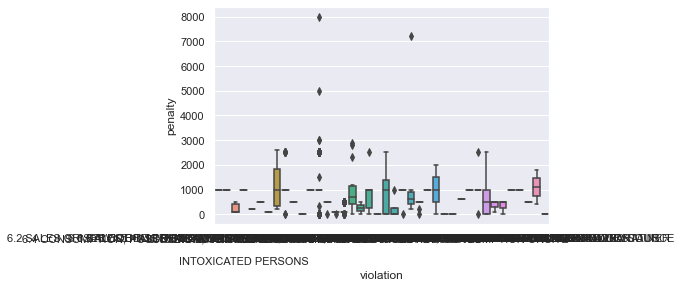

In [39]:
# box plot categorical vars
box_violations=sns.boxplot(x="violation", y="penalty", data=violations_data)

In [40]:
"""
Explore violations by zip code
"""

'\nExplore violations by zip code\n'

In [41]:
# Copy the license violations zip codes into a separate var.
# Use a regular expression to pull out the zip codes.
violations_data["zip"]=violations_data["address"].str.extract(r"((?<=.)\d{5})")
# positive lookbehind, matches to digits exactly 5 long

violations_data["zip"]=violations_data["zip"].astype(int)
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
0,AMY TEX MEX BAR & GRILL,"621 SLIGO AVE. , SILVER SPRING , MARYLAND - 20910",2020-10-31,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,NaT,1000,20910
1,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-10-31,5.10 DISPENSING OF LIQUOR,$1000 +ALERT,NaT,1000,20910
2,A.C. GRILL,"293 MUDDY BRANCH ROAD , GAITHERSBURG , MARYLAN...",2020-10-29,5.4 ALCOHOL AWARENESS CERTIFICATION,$100 +ALERT,NaT,100,20878
3,ANTOJITOS RESTAURANT,"12 EAST DIAMOND AVE. , GAITHERSBURG , MARYLAND...",2020-10-25,6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CO...,$1000 +ALERT,NaT,1000,20877
4,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND...",2020-10-25,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,NaT,1000,20877
5,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND...",2020-10-25,6.8 ALCOHOLIC BEVERAGE CONTAINERS- REFILLING/T...,$200 +ALERT,NaT,200,20877
6,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30,1000,20902
7,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500,20912
8,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100,20910
9,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600,20912


In [42]:
pd.set_option("display.max_colwidth", None)
addr=violations_data["address"].astype(str)
mask=addr.str.slice(-5,-4,1) == "-"

In [43]:
# QA the slicing for zip.
violations_data.loc[mask, ["address","zip"]]

,address,zip
283,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 20895-2123",20895
448,"2211 UNIVERSITY BLVD. W. B, WHEATON, MD 20902-4505",20902
531,"1339 LAMBERTON DRIVE , SILVER SPRING, MD 20902-3414",20902
541,"11407 LOCKWOOD DRIVE , SILVER SPRING, MD 20904-2610",20904
589,"19950 FISHER AVE. , POOLESVILLE, MD 20837-2076",20837
604,"4906 SAINT ELMO AVE. , BETHESDA, MD 20814-6008",20814
605,"4958 BETHESDA AVE. , BETHESDA, MD 20814-5204",20814
630,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 20895-2123",20895
642,"15209 FREDERICK ROAD , ROCKVILLE, MD 20850-1112",20850
718,"12351 GEORGIA AVE. , WHEATON, MD 20906-3649",20906


In [44]:
violations_data["address"]

0                         621 SLIGO AVE. , SILVER SPRING , MARYLAND - 20910
1                          609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910
2                   293 MUDDY BRANCH ROAD , GAITHERSBURG , MARYLAND - 20878
3                    12 EAST DIAMOND AVE. , GAITHERSBURG , MARYLAND - 20877
4                    117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND - 20877
5                    117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND - 20877
6                        2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902
7                   7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912
8                          609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910
9                   7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912
10                  7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912
11                  7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912
12                     2407 PRICE AVENUE , SILVER SPRING , MARYLAND - 20902
13          

In [45]:
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
0,AMY TEX MEX BAR & GRILL,"621 SLIGO AVE. , SILVER SPRING , MARYLAND - 20910",2020-10-31,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,NaT,1000,20910
1,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-10-31,5.10 DISPENSING OF LIQUOR,$1000 +ALERT,NaT,1000,20910
2,A.C. GRILL,"293 MUDDY BRANCH ROAD , GAITHERSBURG , MARYLAND - 20878",2020-10-29,5.4 ALCOHOL AWARENESS CERTIFICATION,$100 +ALERT,NaT,100,20878
3,ANTOJITOS RESTAURANT,"12 EAST DIAMOND AVE. , GAITHERSBURG , MARYLAND - 20877",2020-10-25,6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CONSUMPTION OR POSSESSION BY\n\nINTOXICATED PERSONS,$1000 +ALERT,NaT,1000,20877
4,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND - 20877",2020-10-25,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,NaT,1000,20877
5,CANCUN MEXICAN CUISINE,"117 EAST DIAMOND AVE , GAITHERSBURG , MARYLAND - 20877",2020-10-25,6.8 ALCOHOLIC BEVERAGE CONTAINERS- REFILLING/TAMPERING,$200 +ALERT,NaT,200,20877
6,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-11-30,1000,20902
7,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500,20912
8,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100,20910
9,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600,20912


In [ ]:
# Now I have the zip codes of the Alcohol Beverage License Violations in the var "zip".
# Do frequency of violations by zip code.

In [47]:
# Get counts of the number of violations by zip.
violations_data["zip"].value_counts().sort_values(ascending=False)

20814    118
20852    100
20850     97
20910     93
20878     90
20877     65
20902     63
20879     40
20874     34
20906     34
20876     23
20912     22
20904     19
20854     14
20815     14
20901     12
20832     10
20905     10
20872      9
20855      9
20851      9
20817      8
20871      8
20853      6
20903      6
20895      6
20837      5
20886      5
20816      5
20860      4
20867      2
20818      2
20882      2
20833      2
20866      2
20841      1
20861      1
Name: zip, dtype: int64

In [48]:
# Now the zips are all 5-digits
# Bethesda (20814) and Rockville (20852) have the 2 highest frequencies. 

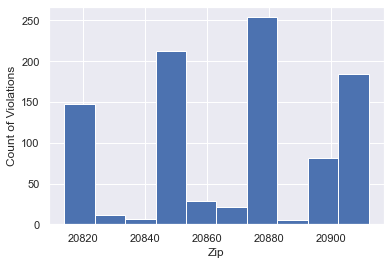

In [49]:
violations_data.sort_values(by=["zip", "facilityname"])

sns.set()
_ = plt.hist(violations_data["zip"])
_ = plt.xlabel('Zip')
_ = plt.ylabel('Count of Violations')
plt.show()

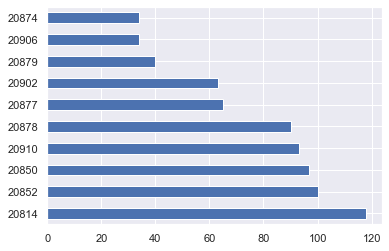

In [50]:
# This plots the top 10 most frequent zip codes. 
violations_data["zip"].value_counts()[:10].plot(kind="barh")


In [ ]:
# This has the potential to be interesting as I recognize some of the zip codes/areas. 
# I'll come back to this.

In [ ]:
### This works but there are too many zip codes to the display is too small to read.

# facet grid of violation amounts by zip code
#grid_viol_zip = sns.FacetGrid(violations_data, col="zip")
#grid_viol_zip.map(plt.hist, "penalty")

In [51]:
"""
Explore the violations involving minors.
"""

'\nExplore the violations involving minors.\n'

In [52]:
# Investigate frequencies by types of violations. 
# Group the sale to minor and 6.1 sales or service to minors. 

In [53]:
# Groupby() function to pull the 2 violations together.
violations_minors = violations_data.groupby("violation").get_group("SALE TO MINOR" or "6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS")

In [54]:
violations_minors

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
134,AKIRA RAMEN IZAKAYA,"1800 ROCKVILLE PIKE, UNIT H1 , ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
137,BURGERFI,"11881 GRAND PARK AVE. , NORTH BETHESDA, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
138,GYROLAND,"1701 ROCKVILLE PIKE B-3, ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
140,OM INDIAN RESTAURANT,"785 ROCKVILLE PIKE K, ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,$1000+ALERT,2019-10-09,1000,20852
142,PIKE CHICKEN & BEER,"1066 ROCKVILLE PIKE , ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
144,PIZZA CS,"1596 ROCKVILLE PIKE , ROCKVILLE, MD 20850",2019-10-09,SALE TO MINOR,$2500+ALERT,2019-10-09,2500,20850
148,7 LOCKS BREWING,"12227 WILKINS AVENUE , ROCKVILLE, MD 20852",2019-09-25,SALE TO MINOR,SETTLED;$1000+ALERT,2019-09-25,1000,20852
149,CAFE 20/20,"4870 BOILING BROOK PARKWAY , ROCKVILLE, MD 20852",2019-09-25,SALE TO MINOR,$2500+ALERT,2019-09-25,2500,20852
152,EL PATIO,"5240 RANDOLPH ROAD , ROCKVILLE, MD 20852",2019-09-25,SALE TO MINOR,SETTLED;$2500+ALERT,2019-09-25,2500,20852
156,MIKE & SONS SUB SHOP,"5404 RANDOLPH ROAD , ROCKVILLE, MD 20852",2019-09-25,SALE TO MINOR,SETTLED;$1000+ALERT,2019-09-25,1000,20852


In [55]:
type(violations_minors)

pandas.core.frame.DataFrame

In [56]:
violations_minors.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
count,381,381,381,381,381,381,381.000000,381.000000
unique,344,355,116,1,55,250,NaN,NaN
top,COURTYARD BY MARRIOTT,"4820 BOILING BROOK PARKWAY , ROCKVILLE, MD 20852",2018-08-14 00:00:00,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2019-10-09 00:00:00,NaN,NaN
freq,4,4,10,381,89,6,NaN,NaN
first,NaN,NaN,2012-12-20 00:00:00,NaN,NaN,2016-01-19 00:00:00,NaN,NaN
last,NaN,NaN,2019-10-09 00:00:00,NaN,NaN,2019-10-09 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1208.341207,20868.627297
std,NaN,NaN,NaN,NaN,NaN,NaN,763.160688,30.565248
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,20814.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,20850.000000


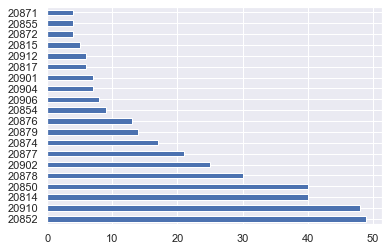

In [57]:
# This plots top 20 zip codes for the violations involving minors.
violations_minors["zip"].value_counts()[:20].plot(kind="barh")

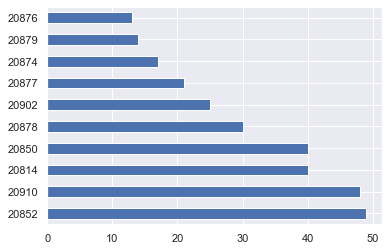

In [58]:
violations_minors["zip"].value_counts()[:10].plot(kind="barh")

In [ ]:
# Since violations involving minors are the most frequent violation overall...
# the plots of the full data set and the violations involving minors data set are very similar.

# Use a stacked bar chart. 
"""
import plotly.express as px

df = px.data.iris()

fig = px.bar(df, x="sepal_width", y="sepal_length", color="species",
			hover_data=['petal_width'], barmode = 'stack')

fig.show()


"""

In [ ]:
"""
Explore the High Schools
"""

In [ ]:
# I may try to overlay the high school locations with areas of highest crime and/or alcohol violations. 

In [ ]:
# Import the public high schools data set.
schools_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/772q-4wm8.json").json())
schools_data.head()

In [ ]:
# Drop the unnecessary columns (i.e., category, elementary/middle schools, phone and url).

In [ ]:
high_schools=schools_data[schools_data["category"] == "HIGH SCHOOLS"]
cols_drop=["category","phone","url"]
high_schools.drop(cols_drop, inplace=True, axis=1)
print(high_schools)

In [ ]:
# Map the high school locations.

In [ ]:
# Import the plotly express package

import plotly.express as px

fig_schools = px.scatter_geo(high_schools, 
                     lon="longitude", 
                     lat="latitude",
                     # choose the map chart's projection
                     projection="albers usa",
                     center=dict(lon=-77.14, lat=39.098),
                     # columns which is in bold in the pop up
                     hover_name = "school_name",
                     # format of the popup not to display these columns' data
                     hover_data = {"longitude": False, "latitude": False})
fig_schools.show()



In [ ]:
# I'm having trouble zooming in on this map. I decided to use a different map (below) that includes streets.

In [ ]:
# Follow instructions from here: https://plotly.com/python/mapbox-layers/#openstreetmap-tiles-no-token-needed
high_schools['latitude']=high_schools['latitude'].astype(float)
high_schools['longitude']=high_schools['longitude'].astype(float)

fig_schools_map = px.scatter_mapbox(high_schools, lat="latitude", lon="longitude", hover_name="school_name", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_schools_map.update_layout(mapbox_style="open-street-map")
fig_schools_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_schools_map.show()


In [ ]:
# Note To Self: I don't know what to do about the warnings (above)
    # A value is trying to be set on a copy of a slice from a DataFrame.
    # Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Note To Self: While this map is OK, I can't decide what would make it better. 
# I was not able to make the points/circles bigger.
# I tried zooming in closer but then not all of the high schools show up.
# I tried to get the city to display as well as the HS name but was not able to get this to work.

# I'll try to map the violations and schools using Tableau.

In [ ]:
"""
Explore mapping the violations.
"""

In [ ]:
# Note To Self: I was able to clean the violation addresses in excel, upload to geocodio, then use that csv to map. 
# However, I want to be able to do this directly from the dataMontgomery API. 

# I tried again for the geolocation using geopy (below) following these instructions from towardsdatascience.com.
#  https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6
# I think there is a limit to how many times I can use the geolocater/site though. Not sure about that. 

In [ ]:
# Import the violations data set (I don't need to do this repeatedly but sometimes I am picking up here when I start again)
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()

In [ ]:
# I had to pip install geopy on the cmd line to get this to work.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sample app")
# Apply geolocator.geocode to the address column
violations_data["location"]=violations_data["address"].apply(geolocator.geocode)

In [ ]:
violations_data["point"]=violations_data["location"].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
# Then pull the values into 3 diff vars (the 3rd one is altitude)

In [ ]:
violations_data[["latitude", "longitude", "altitude"]] = pd.DataFrame(violations_data["point"].to_list(), index=violations_data.index)

In [ ]:
# Map the locations of the violations
fig_violations_map = px.scatter_mapbox(violations_data, lat="latitude", lon="longitude", hover_name="facilityname", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_violations_map.update_layout(mapbox_style="open-street-map")
fig_violations_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_violations_map.show()


In [ ]:
"""
Explore CRASH data
"""

In [ ]:
# Pull in the Crash Incidents data 
# Trying to narrow down by alcohol activity because the dataset is so big.
selections = {"Driver Substance Abuse": "ALCOHOL PRESENT"}

crash_incidents_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/bhju-22kf.json",params=selections).json())
crash_incidents_data.head()

In [ ]:
crash_incidents_data.shape

In [ ]:
crash_incidents_data.describe(include="all")

In [ ]:
"""
Explore CRIME data
"""

In [ ]:
# Pull in the Crimes data 
# Trying to narrow by crimes against society and then crime2 for alcohol violations. 
# looking at the crimes data, there are only 8 alcohol-related crimes in the crimes data set.
# under Crime Name 2  Drunkenness,  Driving Under the Influence,  Liquor Law Violations
#select_crime = {"crimename1": "Crime Against Society"}

crime_data = pd.read_csv("crime.csv")
crime_data.head()

In [ ]:
crime_data.info()

In [ ]:
# Drop unnecessary columns
cols_to_drop=["Offence Code","CR Number","Dispatch Date / Time","Victims","Agency","Place","Sector","Beat","PRA","Address Number","Street Prefix","Street Name","Street Suffix","Street Type","End_Date_Time"]
crime_data.drop(cols_to_drop, inplace=True, axis=1)
crime_data.info()

In [ ]:
crime_data.describe(include="all")

In [ ]:
# There are 3,187 records with blank zip codes.
# There are another 200+ with incorrect zips (wrong number of digits and/or not in Montgomery County).
# Replace missing zip codes values with 0.
crime_data["Zip Code"]=crime_data["Zip Code"].fillna(0)
# change the zip code type to an integer.
crime_data["Zip Code"]=crime_data["Zip Code"].astype(int)

# This plots top 20 zip codes for the crimes.
crime_data["Zip Code"].value_counts()[:20].plot(kind="barh")

In [ ]:
"""
Explore Population data by zip code
"""

In [59]:
# Pull population data from this site https://worldpopulationreview.com/zips/maryland
# This is the csv link:  blob:https://worldpopulationreview.com/00124d35-9d90-48ad-973f-a3eaddcbe13e 
# this is the json link:  blob:https://worldpopulationreview.com/eaa13b61-5379-49d2-a077-3d611a223c7b
# I downloaded MD counties with populations by zip code so I can select Montgomery County. 
# The site says it reflects 2020 population data.
# blob:https://worldpopulationreview.com/087018d8-c25a-44cf-a6d9-cb479a108878
  #      blob:https://worldpopulationreview.com/507fea65-9f1a-483d-89a4-b640e1b3e9bb

In [60]:
pop_zip_codes = pd.read_csv('PopulationZip.csv')
pop_zip_codes.head()

,zip,city,county,pop
0,20906,Silver Spring,Montgomery,70174
1,21234,Parkville,Baltimore,68938
2,20878,Gaithersburg,Montgomery,64126
3,21740,Hagerstown,Washington,61803
4,20874,Germantown,Montgomery,61045


In [61]:
pop_zip_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     467 non-null    int64 
 1   city    467 non-null    object
 2   county  467 non-null    object
 3   pop     467 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 14.7+ KB


In [62]:
# groupby() to pull only Montgomery County zips.
pop_zip_mont = pop_zip_codes.groupby("county").get_group("Montgomery")
pop_zip_mont

,zip,city,county,pop
0,20906,Silver Spring,Montgomery,70174
2,20878,Gaithersburg,Montgomery,64126
4,20874,Germantown,Montgomery,61045
8,20904,Silver Spring,Montgomery,57035
12,20902,Silver Spring,Montgomery,52484
13,20850,Rockville,Montgomery,51568
17,20854,Potomac,Montgomery,49194
22,20852,Rockville,Montgomery,46904
29,20910,Silver Spring,Montgomery,42868
40,20877,Gaithersburg,Montgomery,38885


In [63]:
pop_zip_mont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 450
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     45 non-null     int64 
 1   city    45 non-null     object
 2   county  45 non-null     object
 3   pop     45 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ KB


In [ ]:
# Get frequency of all crimes by zip code. (crimes data set has zip code column) 
# Need to calculate violations per population by zip code and crimes per population by zip code. 
# Compare alcohol violations by zip code with crimes by zip code. 

In [ ]:
# zip codes with high crime rates and zip codes with high ABS licenses and/or violations = correlation? 
# not just look at major crimes but also petty crimes. 

# Do this by taking ABS licenses (or violations) by population by zip code? 
# Then crimes by population by zip code? 